In [1]:
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd

Bullet1: I chose this dataset because it contains 14 key values. And it is likely to be related to the induction of heart disease, which may be more applicable to the next machine learning (the last data set I selected is an independent variable, and the relationship between them is not strong)

In [2]:
df= pd.read_csv (r'heart.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


Bullet2：Visualization and initial data exploration

In [4]:
df.isna().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [5]:
# we dont have null var ,yeaaaa :)

In [6]:
df.head()

age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0   63    1   3     145   233    1        0       150     0      2.3    0   
1   37    1   2     130   250    0        1       187     0      3.5    0   
2   41    0   1     130   204    0        0       172     0      1.4    2   
3   56    1   1     120   236    0        1       178     0      0.8    2   
4   57    0   0     120   354    0        1       163     1      0.6    2   

   caa  thall  output  
0    0      1       1  
1    0      2       1  
2    0      2       1  
3    0      2       1  
4    0      2       1

The label looks confusing. The following is the explanation:    
**Convert <'string'> type data to <'int'> type, which is conducive to model training.**   
Age : Age of the patient  
Sex : Sex of the patient  
cp : Chest Pain type chest pain type  
 Value 1: typical angina  
 Value 2: atypical angina  
 Value 3: non-anginal pain  
 Value 4: asymptomatic 
trtbps : resting blood pressure (in mm Hg)  
chol : cholestoral in mg/dl fetched via BMI sensor  
fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)  
restecg : resting electrocardiographic results  
    Value 0: normal  
    Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)  
    Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria  
thalachh : maximum heart rate achieved  
exng ： Exercise induced angina ~ 1 = Yes, 0 = No  
oldpeak ： Previous peak  
slp ： Slope  
caa ： Number of major vessels  
thall ： Thalium Stress Test result ~ (0,3)  
output ： Target variable ，0= less chance of heart attack 1= more chance of heart attack 

In [7]:
import seaborn as sns

In [8]:
# the heat map is good opti for show the relationship between 13 var and OUTPUT

In [9]:
plt.figure(figsize=(20,15),dpi=1000)
sns.heatmap(data = df.corr(), annot = True, cmap = 'pink_r')

<AxesSubplot:>

In [10]:
#According to the correlation coefficient, 
#the closer to 0, the less relevant. 
#The closer to 1, the more positive correlation, 
#the closer to - 1, the more negative correlation.
# so,chol and fbs maybe is the useless value,but lets keep it by now

<Figure size 21600x16200 with 0 Axes>

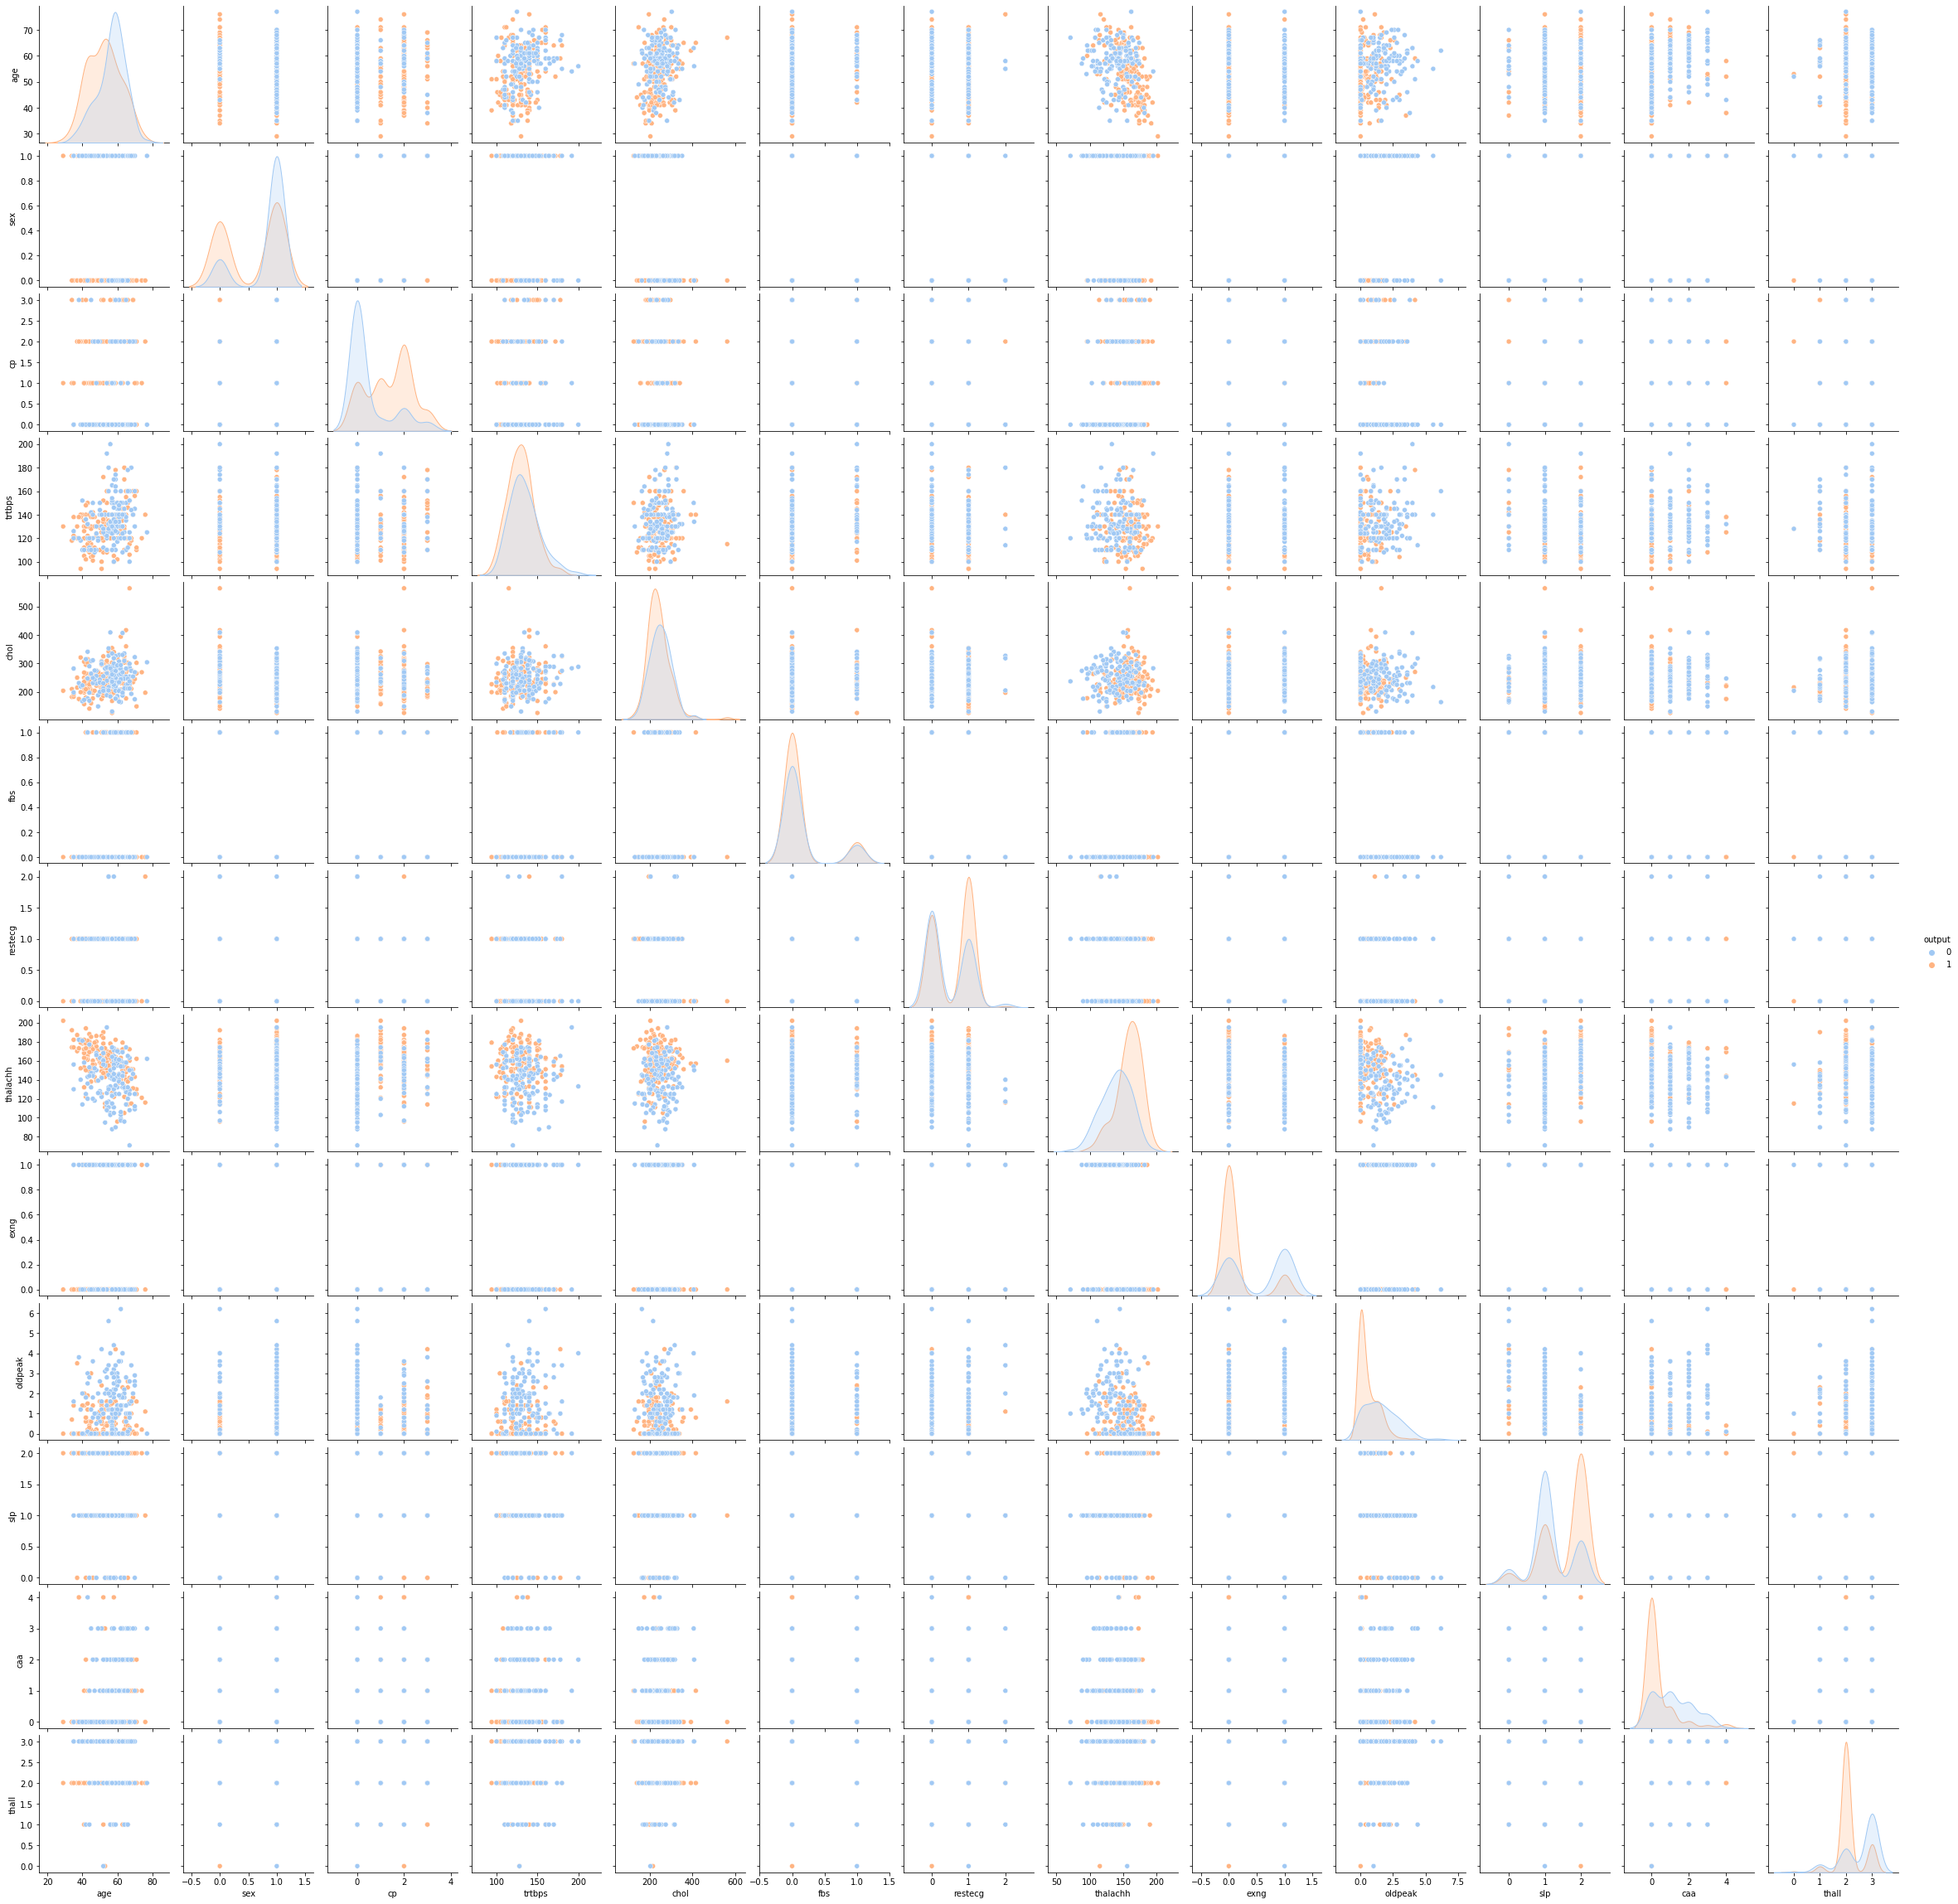

In [11]:
plt.figure(figsize=(20,15),dpi=1080)
sns.pairplot(df, hue='output',palette = "pastel");

In [12]:
#above map also show the data relationship among attributes based on output

In [13]:
#Bullet 2-2 missing values, errors or outliers are handled at the begging

bullet 3:Naïve Bayes Classifier

In [14]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

In [15]:
X = df[['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh','exng', 'oldpeak', 'slp', 'caa', 'thall']].to_numpy()
y = df['output'].to_numpy()
# SPLIT THE TEST & TRAIN BY 30% OF TEST & 70% OF TRAIN 
#train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.3, random_state = 101)

In [16]:
model = MultinomialNB()#alpha=0.0, class_prior=[0.4, 0.6]
model.fit(X,y)
#Train the model with MultinomialNB

MultinomialNB()

accuracy

In [17]:
from sklearn.model_selection import cross_val_score
cross_val_score(model,X,y,cv=3, scoring="accuracy")
#Measuring Accuracy Using Cross-Validation

array([0.71287129, 0.83168317, 0.71287129])

<div>
<img src="https://miro.medium.com/max/1051/1*fxiTNIgOyvAombPJx5KGeA.png" alt="Confusion Matrix" style="width: 400px;"/>
</div>

        TP:95 
        FP:43 
        FN:32 
        TN:133 

In [18]:
from sklearn.model_selection import cross_val_predict
y_pred = cross_val_predict(model,X,y, cv=3)
y_pred#Generate cross validation estimates for each input data point

array([1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,

In [19]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y, y_pred)

array([[ 95,  43],
       [ 32, 133]], dtype=int64)

${precision = \frac{TP}{TP+FP}}$

In [20]:
from sklearn.metrics import precision_score, recall_score
precision_score(y, y_pred)
#It refers to the proportion of positive samples in the positive example determined by the classifier

0.7556818181818182

${recall = \frac{TP}{TP+FN}}$

In [21]:
recall_score(y, y_pred)
#It refers to the proportion of the predicted positive cases in the total positive cases

0.806060606060606

$\large{ F_1 = \frac{2}{\frac{1}{precision} + \frac{1}{recall}} = 2 \times\frac{precision \times recall}{precision + recall} = \frac{TP}{TP + \frac{FN+FP}{2}} }$

In [22]:
from sklearn.metrics import f1_score
f1_score(y, y_pred)

0.780058651026393

ROC

In [23]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y, model.predict_proba(X)[:,1])

0.853842775581906

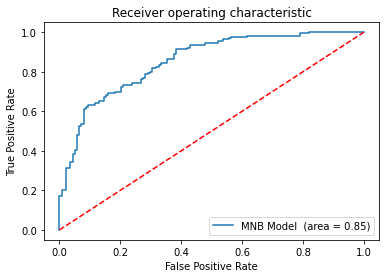

In [24]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
fpr, tpr, thresholds = roc_curve(y, model.predict_proba(X)[:,1])
roc_score=roc_auc_score(y, model.predict_proba(X)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='MNB Model  (area = %0.2f)' % roc_score)
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

**conclusion**

I think the possibility that the accuracy of the model trained by multinomialnb is not high may be related to the selected model (logistic has better accuracy). 
Or it is also related to factors not in the data set (such as social and environmental factors before heart attack)

In [25]:
from sklearn.linear_model import LogisticRegression
#x_train,x_test,y_train,y_test=train_test_split(X, y, test_size = 0.3, random_state = 101)
logistic=LogisticRegression(max_iter=100,random_state=1,n_jobs=-1)
logistic.fit(X,y)
#pred1=logistic.predict(x_test)
lo_ac=cross_val_score(logistic,X,y,cv=3, scoring="accuracy")
print(lo_ac)
roc_auc_score(y, logistic.predict_proba(X)[:,1])

[0.85148515 0.86138614 0.79207921]


0.922880983750549

bullet4:

In [37]:
#According to the correlation coefficient, （at line 9）i choose to divided the original data set into three groups. 
#The first is to remove the two most irrelevant values. 
#The second is to remove six slightly smaller values. 
#The last group retains only the four values most relevant to the output result.

In [38]:
df_12=df.drop(['chol','fbs'],axis=1)
df_8=df_12.drop(['age','sex','trtbps','restecg'],axis=1)
df_5=pd.read_csv(r'heart.csv', usecols=(['cp','thalachh','exng','oldpeak','output']))

bullet5:

In [39]:
df_12.head()

age  sex  cp  trtbps  restecg  thalachh  exng  oldpeak  slp  caa  thall  \
0   63    1   3     145        0       150     0      2.3    0    0      1   
1   37    1   2     130        1       187     0      3.5    0    0      2   
2   41    0   1     130        0       172     0      1.4    2    0      2   
3   56    1   1     120        1       178     0      0.8    2    0      2   
4   57    0   0     120        1       163     1      0.6    2    0      2   

   output  
0       1  
1       1  
2       1  
3       1  
4       1

In [40]:
X_12 = df[['age', 'sex', 'cp', 'trtbps',  'restecg', 'thalachh','exng', 'oldpeak', 'slp', 'caa', 'thall']]
model.fit(X_12,y)

cvs_12=cross_val_score(model,X_12,y,cv=3, scoring="accuracy")
y_pred_12 = cross_val_predict(model,X_12,y, cv=3)
cmatrix_12=confusion_matrix(y, y_pred_12)
pr_12=precision_score(y, y_pred_12)
recall_12=recall_score(y, y_pred_12)
f1_score_12=f1_score(y, y_pred_12)
roc_score_12=roc_auc_score(y, model.predict_proba(X_12)[:,1])
print('Accuracy:',cvs_12,'\n','precision_score:',pr_12,'\n','recall_score:',recall_12,'\n','f1_score:',f1_score_12,'\n','roc:',roc_score_12)

Accuracy: [0.77227723 0.84158416 0.74257426] 
 precision_score: 0.7873563218390804 
 recall_score: 0.8303030303030303 
 f1_score: 0.8082595870206489 
 roc: 0.8657444005270092


In [41]:
df_8.head()

cp  thalachh  exng  oldpeak  slp  caa  thall  output
0   3       150     0      2.3    0    0      1       1
1   2       187     0      3.5    0    0      2       1
2   1       172     0      1.4    2    0      2       1
3   1       178     0      0.8    2    0      2       1
4   0       163     1      0.6    2    0      2       1

In [42]:
X_8 = df[['cp','thalachh','exng', 'oldpeak', 'slp', 'caa', 'thall']]
model.fit(X_8,y)

cvs_8=cross_val_score(model,X_8,y,cv=3, scoring="accuracy")
y_pred_8 = cross_val_predict(model,X_8,y, cv=3)
cmatrix_8=confusion_matrix(y, y_pred_8)
pr_8=precision_score(y, y_pred_8)
recall_8=recall_score(y, y_pred_8)
f1_score_8=f1_score(y, y_pred_8)
roc_score_8=roc_auc_score(y, model.predict_proba(X_8)[:,1])
print('Accuracy:',cvs_8,'\n','precision_score:',pr_8,'\n','recall_score:',recall_8,'\n','f1_score:',f1_score_8,'\n','roc:',roc_score_8)

Accuracy: [0.86138614 0.86138614 0.77227723] 
 precision_score: 0.8097826086956522 
 recall_score: 0.9030303030303031 
 f1_score: 0.8538681948424071 
 roc: 0.8913043478260869


In [43]:
df_5.head()

cp  thalachh  exng  oldpeak  output
0   3       150     0      2.3       1
1   2       187     0      3.5       1
2   1       172     0      1.4       1
3   1       178     0      0.8       1
4   0       163     1      0.6       1

In [44]:
X_5 = df[['cp','thalachh','exng', 'oldpeak']]
model.fit(X_5,y)

cvs_5=cross_val_score(model,X_5,y,cv=3, scoring="accuracy")
y_pred_5 = cross_val_predict(model,X_5,y, cv=3)
cmatrix_5=confusion_matrix(y, y_pred_5)
pr_5=precision_score(y, y_pred_5)
recall_5=recall_score(y, y_pred_5)
f1_score_5=f1_score(y, y_pred_5)
roc_score_5=roc_auc_score(y, model.predict_proba(X_5)[:,1])
print('Accuracy:',cvs_5,'\n','precision_score:',pr_5,'\n','recall_score:',recall_5,'\n','f1_score:',f1_score_5,'\n','roc:',roc_score_5)

Accuracy: [0.79207921 0.81188119 0.77227723] 
 precision_score: 0.7865168539325843 
 recall_score: 0.8484848484848485 
 f1_score: 0.816326530612245 
 roc: 0.8503513394817742


In [45]:
#TRY df_8 traing with logistic model
logistic.fit(X_8,y)

cvs_8=cross_val_score(logistic,X_8,y,cv=3, scoring="accuracy")
y_pred_8 = cross_val_predict(logistic,X_8,y, cv=3)
cmatrix_8=confusion_matrix(y, y_pred_8)
pr_8=precision_score(y, y_pred_8)
recall_8=recall_score(y, y_pred_8)
f1_score_8=f1_score(y, y_pred_8)
roc_score_8=roc_auc_score(y, logistic.predict_proba(X_8)[:,1])
print('Accuracy:',cvs_8,'\n','precision_score:',pr_8,'\n','recall_score:',recall_8,'\n','f1_score:',f1_score_8,'\n','roc:',roc_score_8)

Accuracy: [0.85148515 0.89108911 0.81188119] 
 precision_score: 0.8333333333333334 
 recall_score: 0.9090909090909091 
 f1_score: 0.8695652173913043 
 roc: 0.9011857707509882


**part 1 conclusion**



For various types of data sets, they all have their own most suitable models. 

A more appropriate model will have better efficiency and prediction accuracy. 

At the same time, the accuracy is also related to the number of eigenvalues. 

In my data set, DF_ 8 has the best accuracy.
